In [48]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
response = requests.get("https://pokeapi.co/api/v2/pokemon?limit=1000")
data = response.json()

In [6]:
df_pokemon_list = pd.DataFrame(data["results"])

In [13]:
df_pokemon_list.sample(5)

,name,url
120,starmie,https://pokeapi.co/api/v2/pokemon/121/
517,musharna,https://pokeapi.co/api/v2/pokemon/518/
766,wimpod,https://pokeapi.co/api/v2/pokemon/767/
853,sinistea,https://pokeapi.co/api/v2/pokemon/854/
464,tangrowth,https://pokeapi.co/api/v2/pokemon/465/


In [14]:
details = []

for url in df_pokemon_list["url"]:
    details.append(requests.get(url).json())

df_pokemon_details = pd.json_normalize(details)

In [ ]:
df_pokemon_details.head(5)


,abilities,base_experience,forms,game_indices,height,held_items,id,is_default,location_area_encounters,moves,...,sprites.versions.generation-vi.x-y.front_shiny,sprites.versions.generation-vi.x-y.front_shiny_female,sprites.versions.generation-vii.icons.front_default,sprites.versions.generation-vii.icons.front_female,sprites.versions.generation-vii.ultra-sun-ultra-moon.front_default,sprites.versions.generation-vii.ultra-sun-ultra-moon.front_female,sprites.versions.generation-vii.ultra-sun-ultra-moon.front_shiny,sprites.versions.generation-vii.ultra-sun-ultra-moon.front_shiny_female,sprites.versions.generation-viii.icons.front_default,sprites.versions.generation-viii.icons.front_female
0,"[{'ability': {'name': 'overgrow', 'url': 'http...",64,"[{'name': 'bulbasaur', 'url': 'https://pokeapi...","[{'game_index': 153, 'version': {'name': 'red'...",7,[],1,True,https://pokeapi.co/api/v2/pokemon/1/encounters,"[{'move': {'name': 'razor-wind', 'url': 'https...",...,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,None
1,"[{'ability': {'name': 'overgrow', 'url': 'http...",142,"[{'name': 'ivysaur', 'url': 'https://pokeapi.c...","[{'game_index': 9, 'version': {'name': 'red', ...",10,[],2,True,https://pokeapi.co/api/v2/pokemon/2/encounters,"[{'move': {'name': 'swords-dance', 'url': 'htt...",...,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,None
2,"[{'ability': {'name': 'overgrow', 'url': 'http...",236,"[{'name': 'venusaur', 'url': 'https://pokeapi....","[{'game_index': 154, 'version': {'name': 'red'...",20,[],3,True,https://pokeapi.co/api/v2/pokemon/3/encounters,"[{'move': {'name': 'swords-dance', 'url': 'htt...",...,https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,https://raw.githubusercontent.com/PokeAPI/spri...,None
3,"[{'ability': {'name': 'blaze', 'url': 'https:/...",62,"[{'name': 'charmander', 'url': 'https://pokeap...","[{'game_index': 176, 'version': {'name': 'red'...",6,[],4,True,https://pokeapi.co/api/v2/pokemon/4/encounters,"[{'move': {'name': 'mega-punch', 'url': 'https...",...,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,None
4,"[{'ability': {'name': 'blaze', 'url': 'https:/...",142,"[{'name': 'charmeleon', 'url': 'https://pokeap...","[{'game_index': 178, 'version': {'name': 'red'...",11,[],5,True,https://pokeapi.co/api/v2/pokemon/5/encounters,"[{'move': {'name': 'mega-punch', 'url': 'https...",...,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,None,https://raw.githubusercontent.com/PokeAPI/spri...,None


In [27]:
selected_columns = ["id", "name","height" ,"weight", "types"]
df_pokemon = df_pokemon_details[selected_columns]

In [28]:
df_pokemon.head()

,id,name,height,weight,types
0,1,bulbasaur,7,69,"[{'slot': 1, 'type': {'name': 'grass', 'url': ..."
1,2,ivysaur,10,130,"[{'slot': 1, 'type': {'name': 'grass', 'url': ..."
2,3,venusaur,20,1000,"[{'slot': 1, 'type': {'name': 'grass', 'url': ..."
3,4,charmander,6,85,"[{'slot': 1, 'type': {'name': 'fire', 'url': '..."
4,5,charmeleon,11,190,"[{'slot': 1, 'type': {'name': 'fire', 'url': '..."


In [30]:
max_types = 2

for i in range(max_types):
    df_pokemon[f"type_{i+1}"] = df_pokemon["types"].apply(
        lambda x: x[i]["type"]["name"] if isinstance(x, list) and len
        (x) > i else None
    )

C:\Users\Laptop\AppData\Local\Temp\ipykernel_17740\3314601249.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pokemon[f"type_{i+1}"] = df_pokemon["types"].apply(
C:\Users\Laptop\AppData\Local\Temp\ipykernel_17740\3314601249.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pokemon[f"type_{i+1}"] = df_pokemon["types"].apply(


In [31]:
df_pokemon.head()

,id,name,height,weight,types,type_1,type_2
0,1,bulbasaur,7,69,"[{'slot': 1, 'type': {'name': 'grass', 'url': ...",grass,poison
1,2,ivysaur,10,130,"[{'slot': 1, 'type': {'name': 'grass', 'url': ...",grass,poison
2,3,venusaur,20,1000,"[{'slot': 1, 'type': {'name': 'grass', 'url': ...",grass,poison
3,4,charmander,6,85,"[{'slot': 1, 'type': {'name': 'fire', 'url': '...",fire,None
4,5,charmeleon,11,190,"[{'slot': 1, 'type': {'name': 'fire', 'url': '...",fire,None


In [32]:
#Deleting types list
del df_pokemon["types"]

In [33]:
df_pokemon.head(5)

,id,name,height,weight,type_1,type_2
0,1,bulbasaur,7,69,grass,poison
1,2,ivysaur,10,130,grass,poison
2,3,venusaur,20,1000,grass,poison
3,4,charmander,6,85,fire,None
4,5,charmeleon,11,190,fire,None


In [36]:
#Transforming dm to m
df_pokemon["height"] = df_pokemon["height"] / 10

C:\Users\Laptop\AppData\Local\Temp\ipykernel_17740\3720669743.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pokemon["height"] = df_pokemon["height"] / 10


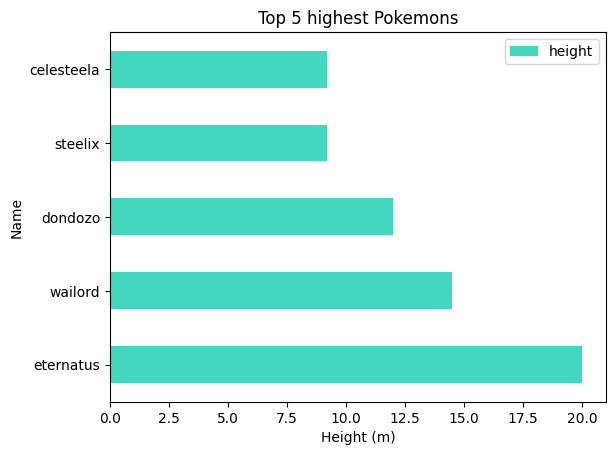

In [ ]:
#PLOT 1 
#Top 5 highest Pokemons

df_pokemon.nlargest(5, 'height')[['name', 'height']].set_index('name').plot(
    kind ='barh',
    title = 'Top 5 highest Pokemons',
    color = '#42d8c0'
)
plt.xlabel('Height (m)')
plt.ylabel('Name')
plt.show()

In [49]:
#Transforming weight into kg
df_pokemon["weight"] = df_pokemon["weight"] / 10

C:\Users\Laptop\AppData\Local\Temp\ipykernel_17740\1876288233.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pokemon["weight"] = df_pokemon["weight"] / 10


C:\Users\Laptop\AppData\Local\Temp\ipykernel_17740\1595208247.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


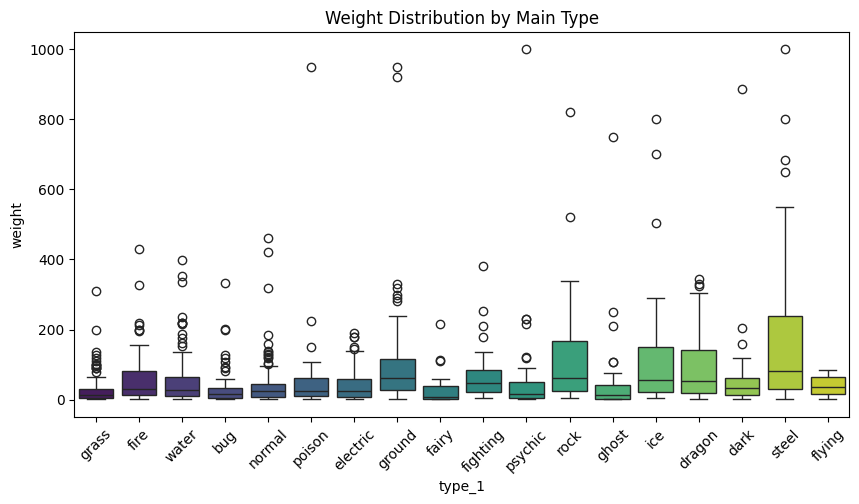

In [50]:
plt.figure(figsize=(10,5))
sns.boxplot(
    data=df_pokemon,
    x='type_1',
    y='weight',
    palette='viridis'
)
plt.xticks(rotation=45)
plt.title('Weight Distribution by Main Type')
plt.show()

In [51]:
dual_type = df_pokemon['type_2'].notna().sum()
single_type = len(df_pokemon) - dual_type

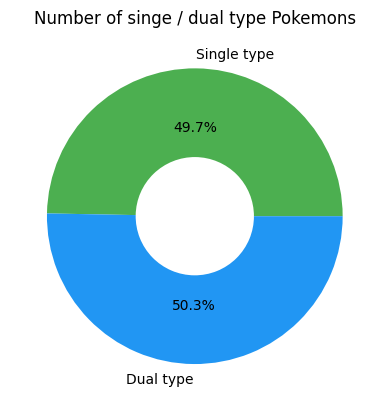

In [52]:
plt.pie(
    [single_type, dual_type],
    labels=['Single type', 'Dual type'],
    autopct='%.1f%%',
    colors=['#4CAF50','#2196F3'],
    wedgeprops={'width':0.6}
)
plt.title("Number of singe / dual type Pokemons")
plt.show()

In [54]:
type_stats = df_pokemon.groupby('type_1').agg({
    'height' : 'mean',
    'weight': 'mean'
}).round(2).sort_values('weight', ascending=False)

type_stats.style.background_gradient(cmap='Blues').set_caption(
    'Mean height and weight by Pokemon type'
)

,height,weight
type_1,,
steel,1.790000,195.680000
ice,1.320000,133.030000
ground,1.390000,131.310000
rock,1.360000,119.250000
dragon,1.790000,97.330000
fighting,1.280000,69.070000
poison,1.680000,63.880000
dark,1.290000,63.320000
fire,1.170000,62.700000


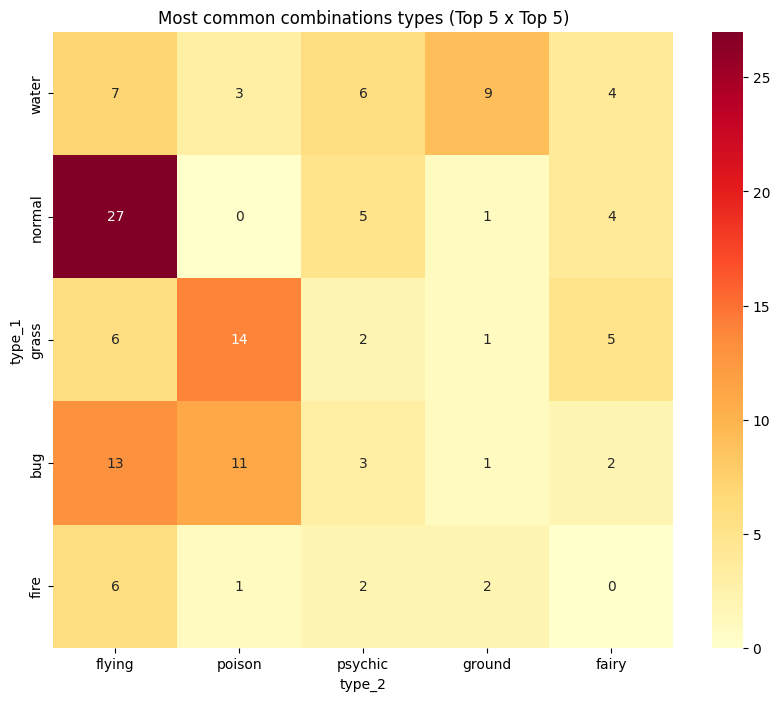

In [55]:
cross_tab = pd.crosstab(df_pokemon['type_1'], df_pokemon['type_2'])

plt.figure(figsize=(10,8))
sns.heatmap(
    cross_tab.loc[
        df_pokemon['type_1'].value_counts().head(5).index,
        df_pokemon['type_2'].value_counts().head(5).index
    ],
    annot=True,
    cmap='YlOrRd'
)
plt.title('Most common combinations types (Top 5 x Top 5)')
plt.show()

In [57]:
#BMI

df_pokemon['bmi'] = df_pokemon['weight'] / (df_pokemon['height']**2)

df_pokemon.nlargest(1, 'bmi')[['name', 'type_1', 'bmi']]

C:\Users\Laptop\AppData\Local\Temp\ipykernel_17740\4174110940.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pokemon['bmi'] = df_pokemon['weight'] / (df_pokemon['height']**2)


,name,type_1,bmi
789,cosmoem,psychic,99990.0


In [58]:
df_pokemon.nsmallest(1, 'bmi')[['name', 'type_1', 'bmi']]

,name,type_1,bmi
92,haunter,ghost,0.039062
